# Section 2 - Panda(s) in training

![Quote from KFP](images/quote2.PNG)

- df.dropna
- df.fillna
nunique, unique, value_counts
- df.set_index('index').sort_index()
- df.loc['index']
- df.iloc['index']

In [1]:
import pandas as pd
%matplotlib inline
import seaborn as sns

In [2]:
t = pd.read_csv('data/train.csv')

In [3]:
t.head()#plots fist 5 df points

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Plot the number of survivors for each of the Passenger class 

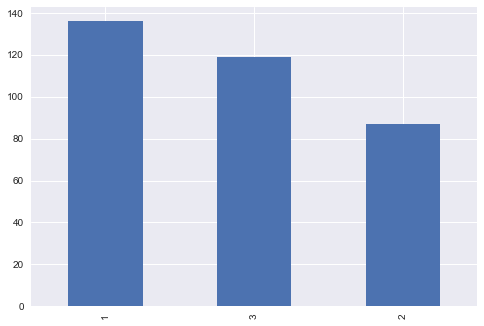

In [4]:
t.Pclass[t.Survived == 1].value_counts().plot('bar') #or....

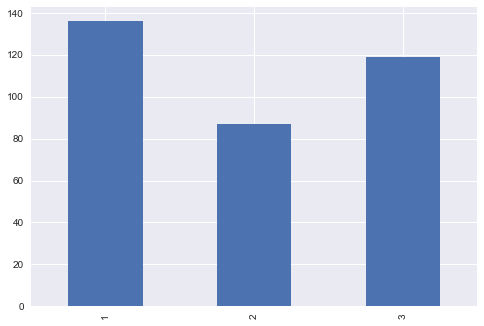

In [5]:
t.Pclass[t.Survived == 1].value_counts().sort_index().plot('bar') #or....

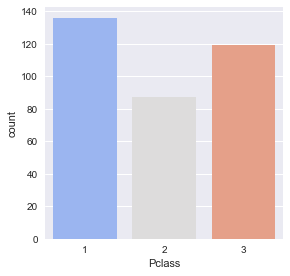

In [6]:
sns.factorplot(x='Pclass',data=t[t.Survived==1],kind='count',palette='coolwarm')

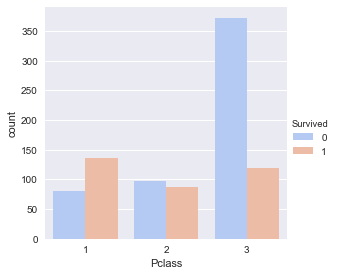

In [7]:
sns.factorplot(x='Pclass',data=t,kind='count',palette='coolwarm',hue='Survived')

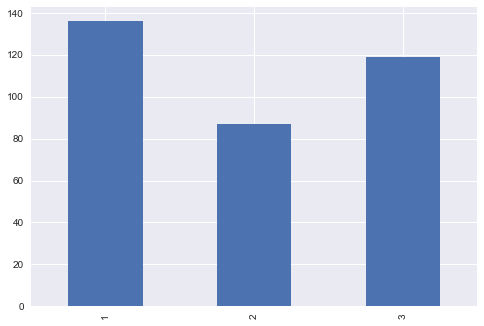

### Which columns have missing values?

In [8]:
t.info()
# Anything that has fewer than 891 non-null entries (Age, Cabin, Embarked)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


### The Cabin column seems to have several missing values. Delete it.

In [9]:
t.drop('Cabin',1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,C


In [10]:
t.drop('Cabin', axis=1, inplace=True) #inplace=True means relabel this new df as t still! #this will run once and then stop working

### Where ages are not available, replace them with the average age.

In [11]:
t.Age.mean()

29.69911764705882

In [12]:
t.Age.fillna(t.Age.mean(),inplace=True)#when this runs the first time it works and the second time it does nothing

In [13]:
t.info() # only 'Embarked' data left to sort out 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(4)
memory usage: 76.6+ KB


### Determine the most frequently embarked location and use this to fill in missing values

In [14]:
t.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [15]:
t.Embarked.fillna('S',inplace=True)

In [16]:
t.info() #nothing is null now

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Embarked       891 non-null object
dtypes: float64(2), int64(5), object(4)
memory usage: 76.6+ KB


### Show only the name, sex and age of all the teenagers

In [17]:
t[(t.Age>=13) & (t.Age <=19)][['Name','Sex','Age']]

,Name,Sex,Age
9,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0
14,"Vestrom, Miss. Hulda Amanda Adolfina",female,14.0
22,"McGowan, Miss. Anna ""Annie""",female,15.0
27,"Fortune, Mr. Charles Alexander",male,19.0
38,"Vander Planke, Miss. Augusta Maria",female,18.0
39,"Nicola-Yarred, Miss. Jamila",female,14.0
44,"Devaney, Miss. Margaret Delia",female,19.0
49,"Arnold-Franchi, Mrs. Josef (Josefine Franchi)",female,18.0
67,"Crease, Mr. Ernest James",male,19.0
68,"Andersson, Miss. Erna Alexandra",female,17.0


### Show the name, age and class of travel of all women who travelled above the age of 50.

In [18]:
t[(t.Sex=='female') & (t.Age >50)][['Name','Age','Pclass']]

,Name,Age,Pclass
11,"Bonnell, Miss. Elizabeth",58.0,1
15,"Hewlett, Mrs. (Mary D Kingcome)",55.0,2
195,"Lurette, Miss. Elise",58.0,1
268,"Graham, Mrs. William Thompson (Edith Junkins)",58.0,1
275,"Andrews, Miss. Kornelia Theodosia",63.0,1
366,"Warren, Mrs. Frank Manley (Anna Sophia Atkinson)",60.0,1
483,"Turkula, Mrs. (Hedwig)",63.0,3
496,"Eustis, Miss. Elizabeth Mussey",54.0,1
513,"Rothschild, Mrs. Martin (Elizabeth L. Barrett)",54.0,1
571,"Appleton, Mrs. Edward Dale (Charlotte Lamson)",53.0,1


### Plot a bar chart showing the number of women who survived (vs. those who did not) travelling in first class

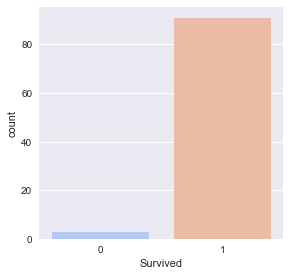

In [19]:
sns.factorplot(x='Survived',data=t[(t.Sex=='female')&(t.Pclass==1)],kind='count',palette='coolwarm')

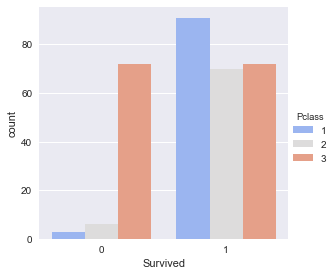

In [33]:
sns.factorplot(x='Survived',data=t[(t.Sex=='female')],kind='count',palette='coolwarm',hue='Pclass') #women who surveived and did not survie split by class

### Create a bar chart showing the number of men who survived (vs. those who did not) travelling in 3rd class

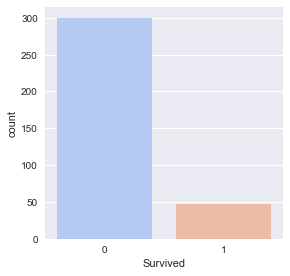

In [20]:
sns.factorplot(x='Survived',data=t[(t.Sex=='male')&(t.Pclass==3)],kind='count',palette='coolwarm')